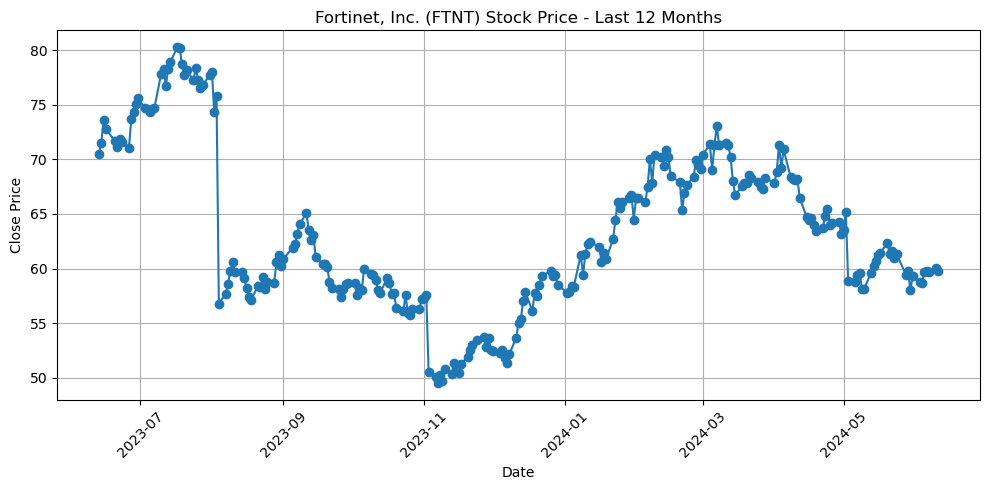

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Function to fetch stock data
def fetch_stock_data():
    # Initialize Chrome WebDriver
    driver = webdriver.Chrome()

    # Go to Yahoo Finance page of Fortinet, Inc. (FTNT)
    driver.get("https://finance.yahoo.com/quote/FTNT/history?p=FTNT")

    # Wait for the page to load
    time.sleep(5)

    # Find the data in the table
    rows = driver.find_elements(By.XPATH, '//table/tbody/tr')
    
    # Parse the table data
    data = []
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, 'td')
        if len(cells) > 0:
            date = cells[0].text
            close_price = cells[4].text
            data.append((date, close_price))
    
    # Close the browser
    driver.quit()

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=["Date", "Close"])
    df["Date"] = pd.to_datetime(df["Date"])
    df["Close"] = pd.to_numeric(df["Close"].str.replace(',', ''), errors='coerce')
    # errors='coerce' This parameter tells Pandas to coerce (force) invalid parsing values to NaN (Not a Number). This means that any value which cannot be converted to a number will be replaced with NaN.

    # Filter data to get the last three months
    twelve_months_ago = datetime.now() - pd.DateOffset(months=12)
    df = df[df["Date"] >= twelve_months_ago]

    # Plot the data
    plt.figure(figsize=(10, 5))
    plt.plot(df["Date"], df["Close"], marker='o') # The 'o' stands for a circular marker
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title("Fortinet, Inc. (FTNT) Stock Price - Last 12 Months")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Fetch stock data and plot it
fetch_stock_data()